# Week 6 : Classification Exercise (Breast Cancer Dataset)


---

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Import necessary libraries for data processing to modelling

Load Dataset

In [ ]:
# 1. Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Zwelious/DM_W2/refs/heads/main/breast-cancer.csv')
df.sample(n=10)

# Viewing random 10 rows of the data.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
351,899667,M,15.750,19.22,107.10,758.6,0.12430,0.23640,0.291400,0.12420,...,17.36,24.17,119.40,915.3,0.15500,0.50460,0.68720,0.21350,0.4245,0.10500
172,87164,M,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,...,18.79,17.04,125.00,1102.0,0.15310,0.35830,0.58300,0.18270,0.3216,0.10100
24,852552,M,16.650,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.09170,...,26.46,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
161,8711803,M,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.119300,0.09667,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.22640,0.17770,0.2443,0.06251
118,864877,M,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.09479,...,20.19,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520
493,914101,B,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
145,869476,B,11.900,14.65,78.11,432.8,0.11520,0.12960,0.037100,0.03003,...,13.15,16.51,86.26,509.6,0.14240,0.25170,0.09420,0.06042,0.2727,0.10360
103,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.03029,...,10.76,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
448,911150,B,14.530,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.02925,...,16.30,28.39,108.10,830.5,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463
79,8610908,B,12.860,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.02315,...,14.24,24.82,91.88,622.1,0.12890,0.21410,0.17310,0.07926,0.2779,0.07918


Exploratory Data Analysis

In [ ]:
# 2. Display the info column
df.info()

# This is used to check datatype for each columns, as well as how many non-null values, and how many entries are in the dataset.
# There is a total of 569 non-null entries across all columns, with the all of the datatypes except for the target variable (diagnosis) being numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# 3. Display the describe column
df.describe()

# This is used to display the numerical values of each numerical attributes, starting from rows count, average, standard deviation, each quartile, and lastly minimum and maximum value.
# We can see that area_worst is the entity with the highest range (seen from the standard deviation and highest maximum value)
# On the other hand, concave points_mean has the smallest range between them all.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# 4. Unique values count for categorical column (in this case target column "diagnosis")
print(df['diagnosis'].value_counts(dropna=False))

# The dataset has more outcomes of B (almost 2x the M value)
# B stands for Benign or non-cancerous, while M stands for Malignant (cancerous)

diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
# 5. Null handling
df.isnull().sum()

# The table below shows the number of null values in each columns, where as shown below, the dataset has no missing values.

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Data Visualization

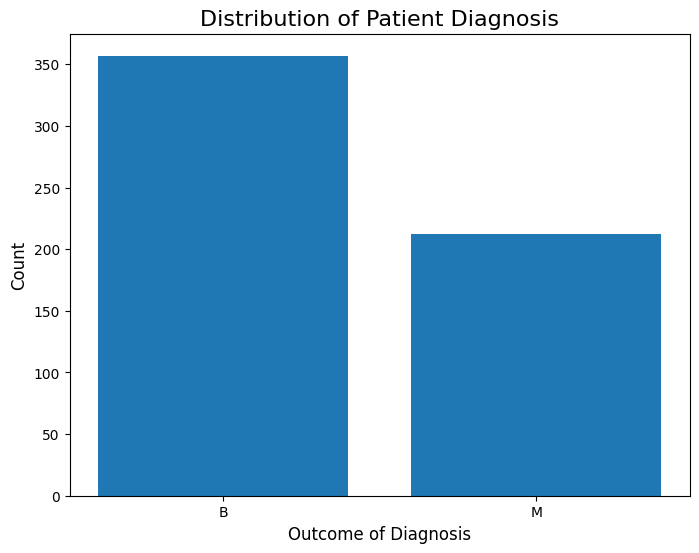

In [ ]:
# 1. Bar Chart
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)

plt.title('Distribution of Patient Diagnosis', fontsize=16)
plt.xlabel('Outcome of Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks([0, 1])

plt.show()

# The bar chart shows the comparison of the diagnosis, where we can see that a lot of the patients' tumors are benign or non-cancerous.

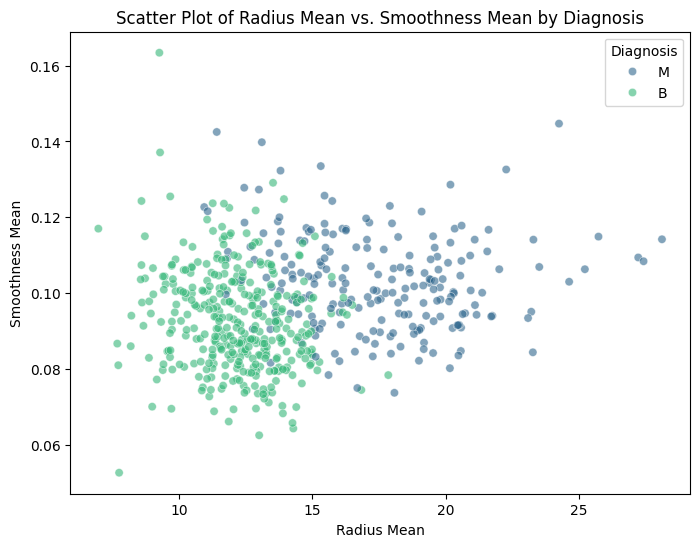

In [ ]:
# 2. Pairplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='radius_mean', y='smoothness_mean', hue='diagnosis', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Radius Mean vs. Smoothness Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Smoothness Mean')
plt.legend(title='Diagnosis')
plt.show()
# From the pairplot, the most obvious summary is that the bigger the radius mean, the more diagnosis are malignant.
# However, for the smoothness mean, it does not seem to affect the diagnosis that much.

Data Encoding

In [ ]:
label_encoder = LabelEncoder()

df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

df.sample(n = 5)

# Using label encoder to encode the categorical columns (target variable: diagnosis)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,8913,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.11860,0.05366,0.2309,0.06915
392,903507,1,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,...,21.20,29.41,142.10,1359.0,0.16810,0.3913,0.55530,0.21210,0.3187,0.10190
197,877159,1,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
420,906539,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.12490,0.1937,0.25600,0.06664,0.3035,0.08284
310,893783,0,11.70,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,...,12.61,26.55,80.92,483.1,0.12230,0.1087,0.07915,0.05741,0.3487,0.06958


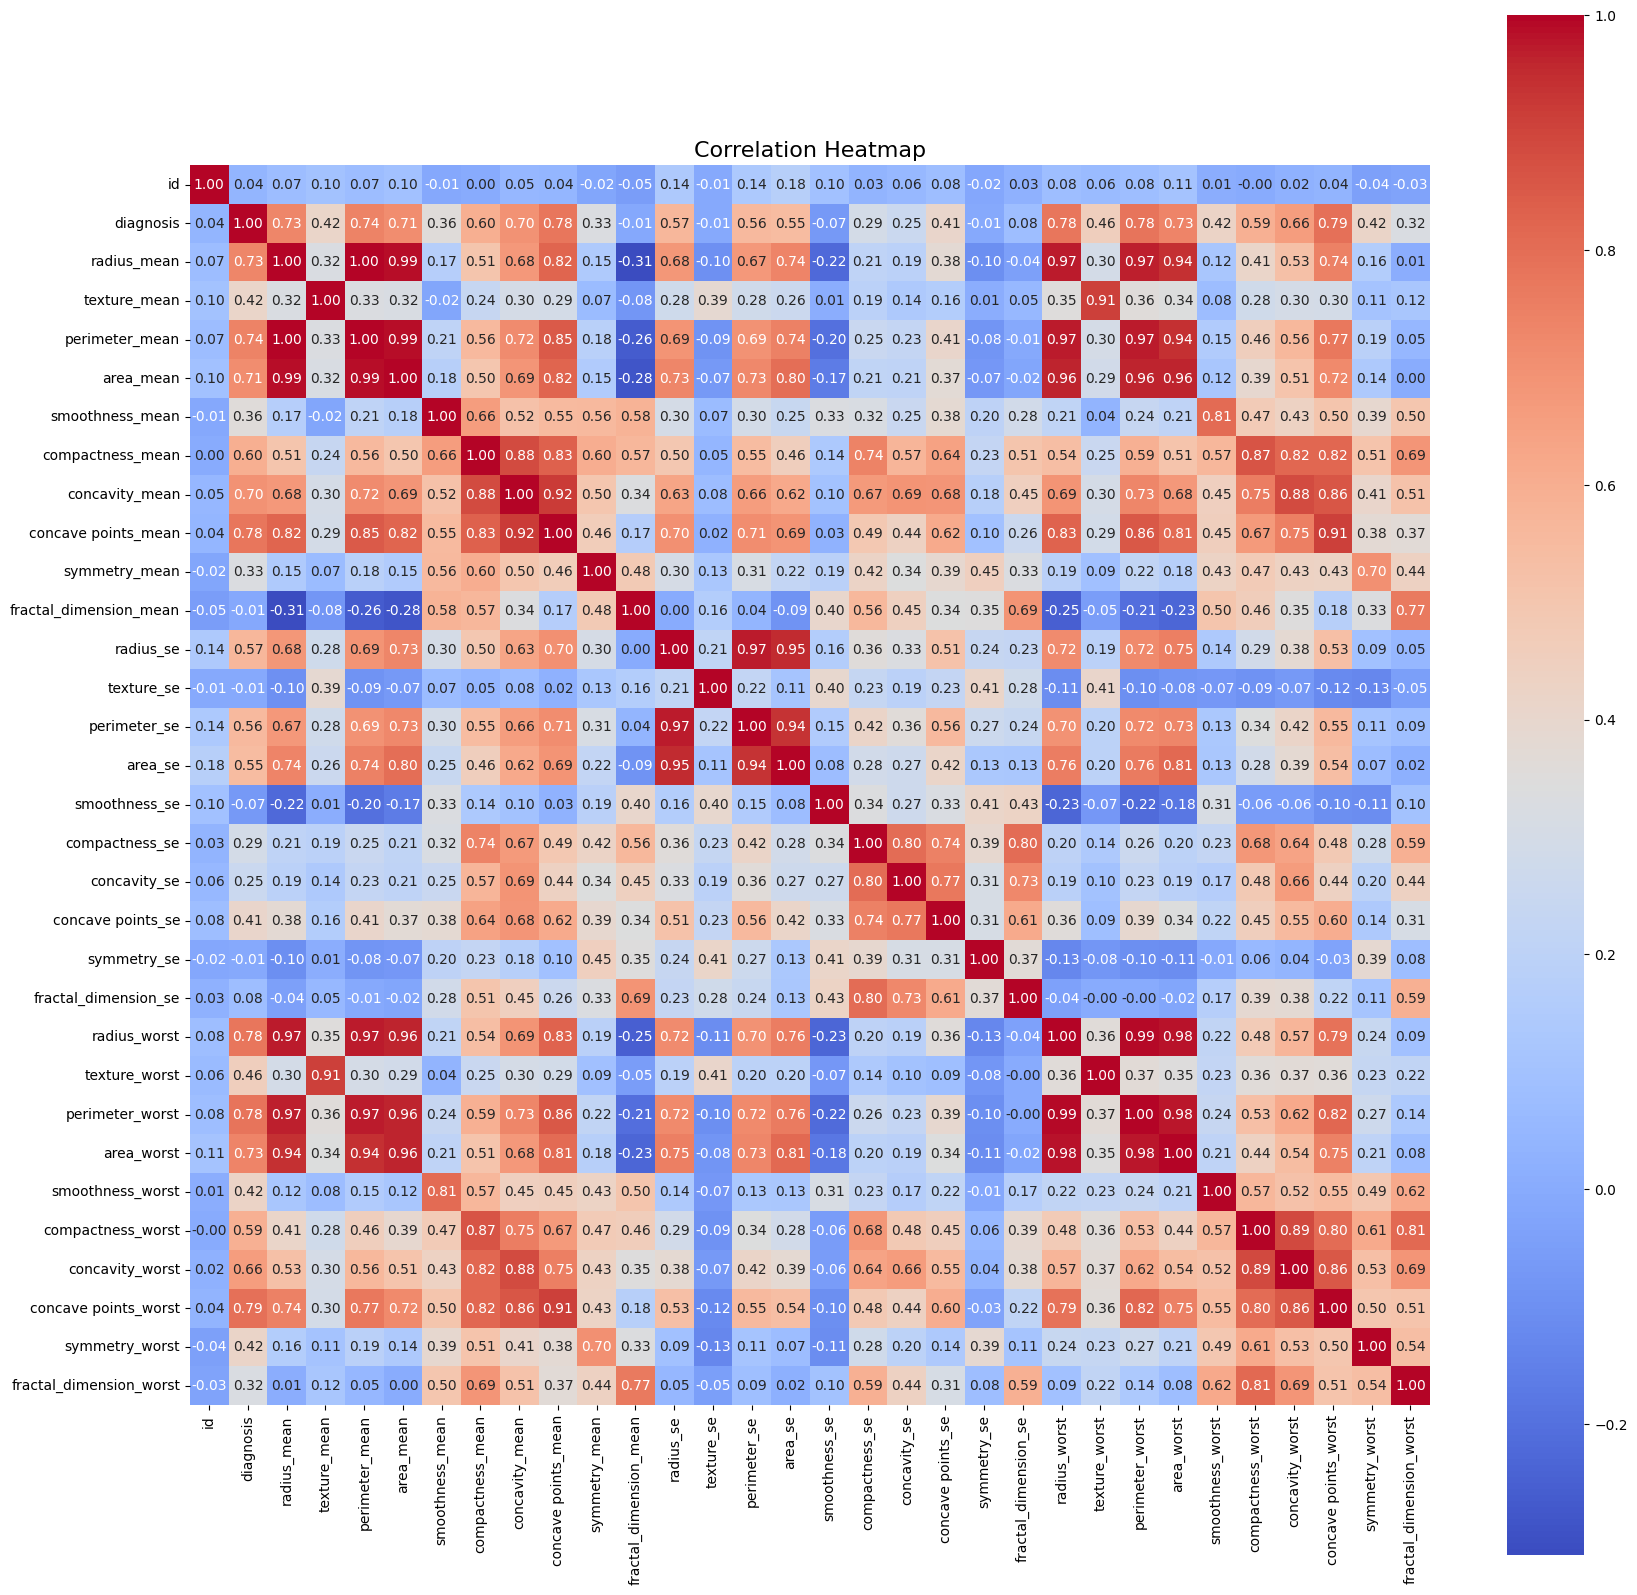

In [ ]:
# 3. Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# The correlation heatmap shows the correlation of each attributes to the target variable (diagnosis)
# The most related attributes are such as concave points_worst, concave points_mean, radius_worst, perimeter_worst.
# However, the most unrelated attribute is texture and symmetry.

Machine Learning

In [ ]:
# 1. Decision Tree (Criterion Entropy) Classification

X = df.drop(['diagnosis', 'id'], axis = 1)
y = df['diagnosis']

# First is to declare which variable is the target variable (also dropping the target variable in the X).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Next is to divide the dataset into 80% train data (for training the model), and 20% testing data.

In [ ]:
X_train.shape, X_test.shape
# To make sure the shape of each train and test data is true to 80-20 division.

((455, 30), (114, 30))

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score based on the y_test and y_pred, and it results with an almost perfect 95.6 percent accuracy.

Model accuracy score with criterion entropy: 0.9561


In [ ]:
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9561
Training accuracy: 0.9802


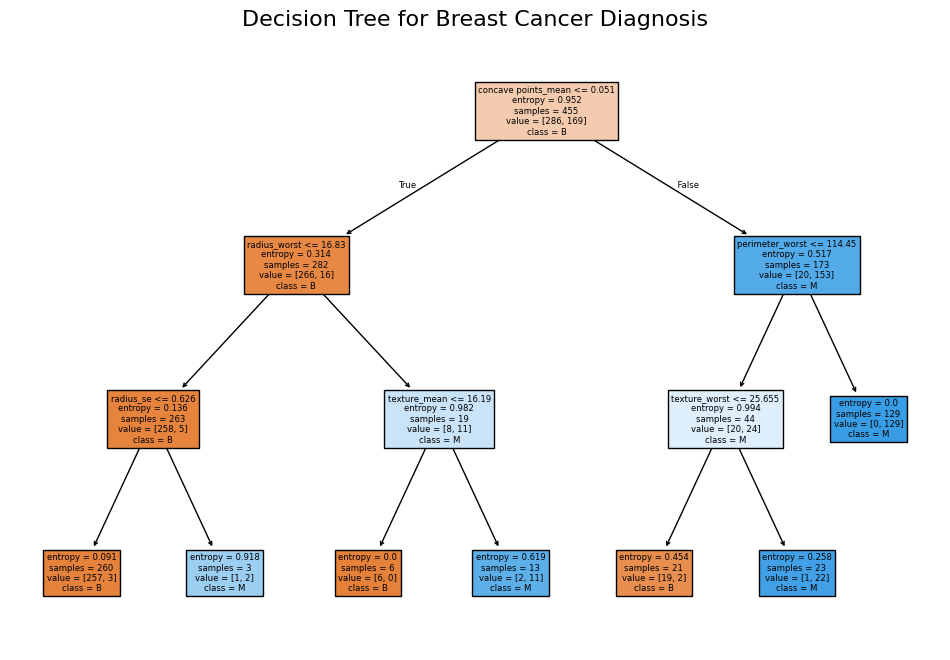

In [ ]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=["B", "M"], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

In [ ]:
# 2. Decision Tree (Criterion Gini) Classification

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.

In [ ]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred, and it results with an almost perfect 93.86 percent accuracy.

Model accuracy score with criterion gini: 0.9386


In [ ]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9386
Training accuracy: 0.9780


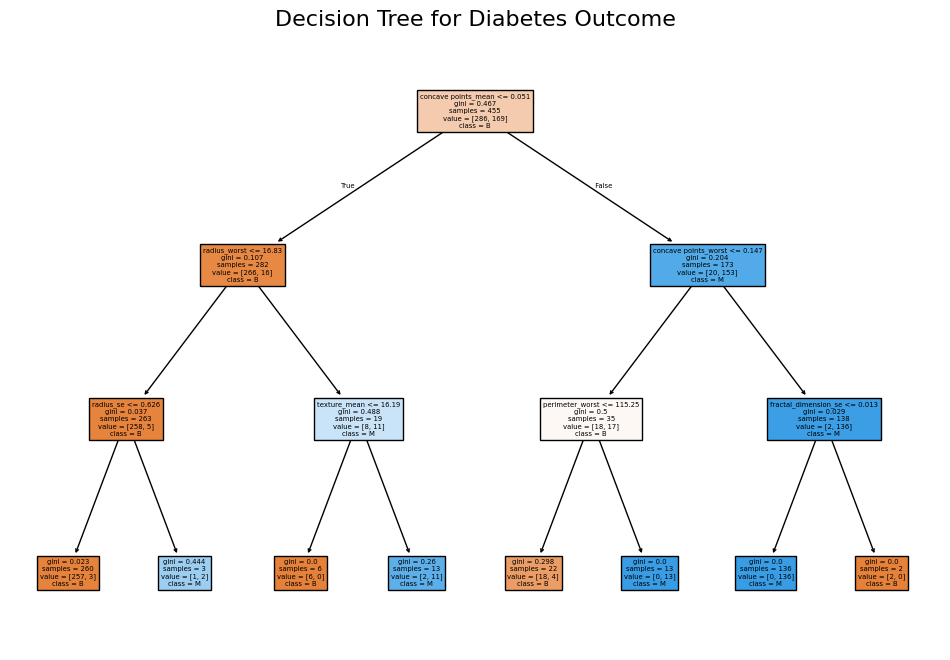

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['B', 'M'], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Gini algorithm.

In [ ]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[70  1]
 [ 4 39]]
Confusion Matrix Gini Index:
 [[68  3]
 [ 4 39]]


In [ ]:
# 3. Naive Bayes Classifier

nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

# Showing the accuracy score based on the y_test and y_pred, and it results with an almost perfect 97.37 percent accuracy.

Model accuracy score: 0.9737


In [ ]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9737
Training accuracy: 0.9363


In [ ]:
# 4. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Modelling and fitting using random forest classifier, with estimators of 100 times.

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Showing the accuracy score based on the y_test and y_pred, and it results with an almost perfect 96.5 percent accuracy, similar to using Criterion Entropy.

Accuracy: 0.9649122807017544


In [ ]:
y_train_rf = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9649
Training accuracy: 0.9363


In [ ]:
cm_en = confusion_matrix(y_test, y_pred_en)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Entropy:")
print(cm_en)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)


# Confusion matrix of each models

Confusion Matrix Entropy:
[[70  1]
 [ 4 39]]

Confusion Matrix Gini:
[[68  3]
 [ 4 39]]

Confusion Matrix Naive Bayes:
[[71  0]
 [ 3 40]]

Confusion Matrix Random Forest:
[[70  1]
 [ 3 40]]


In [ ]:
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)
class_report_nb = classification_report(y_test, y_pred_nb)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)
print("Classification Report Naive Bayes: \n", class_report_nb)
print("Classification Report Random Forest: \n", class_report_rf)


# Printing the classification report both Criterion Entropy and Criterion Gini.

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.9

In [ ]:
# Conclusion
# From the results above (especially accuracy), we can conclude that these 4 models all generate almost perfect results.
# Naive Bayes might have the absolute best, but it does not mean too much compared to the others.
# Overall, all models are balanced at predicting both diagnosis.
# For future predictions, all four models could be used, and be compared with each other to define which is the most accurate for even further diagnosis.
# Note: since the predicting columns are 30, with some correlation number to the target variable being high, it is safe to say that the dataset have enough data to make predictions.